# Presidents of the US Datasets

For this analysis, I am mergeing 3 datasets. I gathered two datasets that contain the birthdays and birth states of the US Presidents. More about those can be found here: https://people.math.sc.edu/Burkardt/datasets/presidents/presidents.html

The third dataset was gathered from Kaggle. It contains when the president was elected, when their term ended, their previous occupation, their supporting party and the vice president during their term. More can be found here: https://www.kaggle.com/datasets/harshitagpt/us-presidents

I'm also using a dataset that contains the 50 states, their abbreviation, region and division. More about this dataset here: https://www.kaggle.com/datasets/omer2040/usa-states-to-region

In [1]:
#imports
import datetime
import pandas as pd

## Data-driven Questions

The following are the initial questions I had for the analysis.

1. How many presidents were born in the same state?
1. Which state was the birth state of the most US presidents?
1. How many presidents were born in the same year?

While these are good questions, they can all be answered from one dataset. I want to ask questions that would require me to combine more data. 

## New Questions: Why Combine the Datasets

1. Who is the first born president of each region?
1. Which president was the youngest at the time of election?
1. Does the states presidents were born in vary over time?

In [2]:
presidents_birthdays_url = 'https://github.com/stubbsdiondra/PortfolioProjects/raw/main/US%20Presidents%20Analysis%20Project/president_birthdays.csv'
presidents_states_url = 'https://github.com/stubbsdiondra/PortfolioProjects/raw/main/US%20Presidents%20Analysis%20Project/president_states.csv'
us_presidents_url = 'https://github.com/stubbsdiondra/PortfolioProjects/raw/main/US%20Presidents%20Analysis%20Project/us_presidents.csv'
states_url = 'https://github.com/stubbsdiondra/PortfolioProjects/raw/main/US%20Presidents%20Analysis%20Project/states%5B1%5D.csv'

In [3]:
presidents_birthdays = pd.read_csv(presidents_birthdays_url)
presidents_states = pd.read_csv(presidents_states_url)
us_presidents = pd.read_csv(us_presidents_url)
states = pd.read_csv(states_url)

## Tidying the Data

I want to look at all the datasets and tidy the datasets by fixing any missing or incorrect data.

In [4]:
presidents_birthdays

,Index,Name,Day,Month,Year
0,1,George Washington,22,2,1732.0
1,2,John Adams,30,10,1735.0
2,3,Thomas Jefferson,13,4,1743.0
3,4,James Madison,16,3,1751.0
4,5,James Monroe,28,4,1758.0
5,6,John Quincy Adams,11,7,1767.0
6,7,Andrew Jackson,15,3,1767.0
7,8,Martin Van Buren,5,12,1782.0
8,9,William Henry Harrison,9,2,1773.0
9,10,John Tyler,29,3,1790.0


In [5]:
presidents_birthdays.dtypes

Index      int64
Name      object
Day        int64
Month     object
Year     float64
dtype: object

With the Presidents birthdays dataset I want to change the type of the Year column to int instead of float and correct the birthday for President James K. Polk.

In [6]:
presidents_birthdays.columns

Index(['Index', 'Name', 'Day', 'Month', 'Year'], dtype='object')

In [7]:
presidents_birthdays.iloc[10]

Index               11
Name     James K. Polk
Day                  2
Month         11. 1795
Year               NaN
Name: 10, dtype: object

In [8]:
# filling the NaN value in row 10 for President James K. Polk birth year
presidents_birthdays['Year'].fillna(1795, inplace = True)

In [9]:
# changing birth month for President James K. Polk
presidents_birthdays['Month'] = presidents_birthdays['Month'].replace([' 11. 1795'],11)

In [10]:
presidents_birthdays.iloc[10]

Index               11
Name     James K. Polk
Day                  2
Month               11
Year            1795.0
Name: 10, dtype: object

Converting 'Year' and 'Month' columns to correct types. The should both be int.

In [11]:
presidents_birthdays['Year'] = presidents_birthdays['Year'].astype(int)

In [12]:
presidents_birthdays['Month'] = presidents_birthdays['Month'].astype(int)

In [13]:
presidents_birthdays.dtypes

Index     int64
Name     object
Day       int64
Month     int32
Year      int32
dtype: object

I want to set the index column also.

In [14]:
presidents_birthdays.set_index('Index').head()

,Name,Day,Month,Year
Index,,,,
1,George Washington,22,2,1732
2,John Adams,30,10,1735
3,Thomas Jefferson,13,4,1743
4,James Madison,16,3,1751
5,James Monroe,28,4,1758


Now I can look at the other datasets.

In [15]:
presidents_states.head()

,Name,Birth State
0,George Washington,"""Virginia"""
1,John Adams,"""Massachusetts"""
2,Thomas Jefferson,"""Virginia"""
3,James Madison,"""Virginia"""
4,James Monroe,"""Virginia"""


In [16]:
states.head()

,State,State Code,Region,Division
0,Alaska,AK,West,Pacific
1,Alabama,AL,South,East South Central
2,Arkansas,AR,South,West South Central
3,Arizona,AZ,West,Mountain
4,California,CA,West,Pacific


In [17]:
us_presidents

,Unnamed: 0,S.No.,start,end,president,prior,party,vice
0,0,1,"April 30, 1789","March 4, 1797",George Washington,Commander-in-Chief of the Continental Army ...,Nonpartisan [13],John Adams
1,1,2,"March 4, 1797","March 4, 1801",John Adams,1st Vice President of the United States,Federalist,Thomas Jefferson
2,2,3,"March 4, 1801","March 4, 1809",Thomas Jefferson,2nd Vice President of the United States,Democratic- Republican,Aaron Burr
3,3,4,"March 4, 1809","March 4, 1817",James Madison,5th United States Secretary of State (1801–...,Democratic- Republican,George Clinton
4,4,5,"March 4, 1817","March 4, 1825",James Monroe,7th United States Secretary of State (1811–...,Democratic- Republican,Daniel D. Tompkins
5,5,6,"March 4, 1825","March 4, 1829",John Quincy Adams,8th United States Secretary of State (1817–...,Democratic- Republican,John C. Calhoun
6,6,7,"March 4, 1829","March 4, 1837",Andrew Jackson,U.S. Senator ( Class 2 ) from Tennessee ...,Democratic,John C. Calhoun
7,7,8,"March 4, 1837","March 4, 1841",Martin Van Buren,8th Vice President of the United States,Democratic,Richard Mentor Johnson
8,8,9,"March 4, 1841","April 4, 1841",William Henry Harrison,United States Minister to Colombia (1828–1829),Whig,John Tyler
9,9,10,"April 4, 1841","March 4, 1845",John Tyler,10th Vice President of the United States,"Whig April 4, 1841 – September 13, 1841",Office vacant


I want to make the Unnamed column the index for the us_presidents dataset and remove the S.No column.

I also want to make sure the types are correct for each column.

In [18]:
us_presidents.columns

Index(['Unnamed: 0', 'S.No.', 'start', 'end', 'president', 'prior', 'party',
       'vice'],
      dtype='object')

In [19]:
us_presidents = us_presidents.drop(columns=['S.No.'])

In [20]:
us_presidents.set_index('Unnamed: 0')

,start,end,president,prior,party,vice
Unnamed: 0,,,,,,
0,"April 30, 1789","March 4, 1797",George Washington,Commander-in-Chief of the Continental Army ...,Nonpartisan [13],John Adams
1,"March 4, 1797","March 4, 1801",John Adams,1st Vice President of the United States,Federalist,Thomas Jefferson
2,"March 4, 1801","March 4, 1809",Thomas Jefferson,2nd Vice President of the United States,Democratic- Republican,Aaron Burr
3,"March 4, 1809","March 4, 1817",James Madison,5th United States Secretary of State (1801–...,Democratic- Republican,George Clinton
4,"March 4, 1817","March 4, 1825",James Monroe,7th United States Secretary of State (1811–...,Democratic- Republican,Daniel D. Tompkins
5,"March 4, 1825","March 4, 1829",John Quincy Adams,8th United States Secretary of State (1817–...,Democratic- Republican,John C. Calhoun
6,"March 4, 1829","March 4, 1837",Andrew Jackson,U.S. Senator ( Class 2 ) from Tennessee ...,Democratic,John C. Calhoun
7,"March 4, 1837","March 4, 1841",Martin Van Buren,8th Vice President of the United States,Democratic,Richard Mentor Johnson
8,"March 4, 1841","April 4, 1841",William Henry Harrison,United States Minister to Colombia (1828–1829),Whig,John Tyler


In [21]:
us_presidents.dtypes

Unnamed: 0     int64
start         object
end           object
president     object
prior         object
party         object
vice          object
dtype: object

 I want to remove the "" from the Birth State column in the presidents_states dataset.

In [22]:
presidents_states.head()

,Name,Birth State
0,George Washington,"""Virginia"""
1,John Adams,"""Massachusetts"""
2,Thomas Jefferson,"""Virginia"""
3,James Madison,"""Virginia"""
4,James Monroe,"""Virginia"""


In [23]:
presidents_states.columns

Index(['Name', 'Birth State'], dtype='object')

In [24]:
presidents_states['Birth State'] = presidents_states['Birth State'].str.replace(r'"', '')

In [25]:
presidents_states.head()

,Name,Birth State
0,George Washington,Virginia
1,John Adams,Massachusetts
2,Thomas Jefferson,Virginia
3,James Madison,Virginia
4,James Monroe,Virginia


Everything looks fine now! 

I'm going to merge the president's states and birthdays datasets first. They are going to be merged on the column name.

In [26]:
presidents_df = pd.concat([presidents_birthdays, presidents_states], axis = 1)

In [27]:
presidents_df = pd.merge(presidents_birthdays, presidents_states, on = 'Name').set_index('Index')

In [28]:
presidents_df

,Name,Day,Month,Year,Birth State
Index,,,,,
1,George Washington,22,2,1732,Virginia
2,John Adams,30,10,1735,Massachusetts
3,Thomas Jefferson,13,4,1743,Virginia
4,James Madison,16,3,1751,Virginia
5,James Monroe,28,4,1758,Virginia
6,John Quincy Adams,11,7,1767,Massachusetts
7,Andrew Jackson,15,3,1767,South Carolina
8,Martin Van Buren,5,12,1782,New York
9,William Henry Harrison,9,2,1773,Virginia


Now I can add the other us_presidents dataset to the presidents_df. I';m going to use the concat method. Concatenation is a string operation. In order for it to work properly, the column type must be object.

Before I can merge the columns, I know I want to merge the three datasets on the name column. I need to change the 'president' column to name in the us_presidents dataset.

In [29]:
us_presidents = us_presidents.rename(columns={'president':'Name'})

When I first ran the concat method to combine presidents_df and us_presidents, I got a bunch on NaN values added to the DataFrame. To fix it, I reset the indexes for both datasets. That worked.

In [30]:
presidents_df.reset_index(drop=True, inplace=True)
us_presidents.reset_index(drop=True, inplace=True)

In [31]:
presidents_df2 = pd.concat([presidents_df, us_presidents], axis=1)

In [32]:
presidents_df2 = pd.merge(presidents_df, us_presidents, on = 'Name')

In [33]:
presidents_df2

,Name,Day,Month,Year,Birth State,Unnamed: 0,start,end,prior,party,vice
0,George Washington,22,2,1732,Virginia,0,"April 30, 1789","March 4, 1797",Commander-in-Chief of the Continental Army ...,Nonpartisan [13],John Adams
1,John Adams,30,10,1735,Massachusetts,1,"March 4, 1797","March 4, 1801",1st Vice President of the United States,Federalist,Thomas Jefferson
2,Thomas Jefferson,13,4,1743,Virginia,2,"March 4, 1801","March 4, 1809",2nd Vice President of the United States,Democratic- Republican,Aaron Burr
3,James Madison,16,3,1751,Virginia,3,"March 4, 1809","March 4, 1817",5th United States Secretary of State (1801–...,Democratic- Republican,George Clinton
4,James Monroe,28,4,1758,Virginia,4,"March 4, 1817","March 4, 1825",7th United States Secretary of State (1811–...,Democratic- Republican,Daniel D. Tompkins
5,John Quincy Adams,11,7,1767,Massachusetts,5,"March 4, 1825","March 4, 1829",8th United States Secretary of State (1817–...,Democratic- Republican,John C. Calhoun
6,Andrew Jackson,15,3,1767,South Carolina,6,"March 4, 1829","March 4, 1837",U.S. Senator ( Class 2 ) from Tennessee ...,Democratic,John C. Calhoun
7,Martin Van Buren,5,12,1782,New York,7,"March 4, 1837","March 4, 1841",8th Vice President of the United States,Democratic,Richard Mentor Johnson
8,William Henry Harrison,9,2,1773,Virginia,8,"March 4, 1841","April 4, 1841",United States Minister to Colombia (1828–1829),Whig,John Tyler
9,John Tyler,29,3,1790,Virginia,9,"April 4, 1841","March 4, 1845",10th Vice President of the United States,"Whig April 4, 1841 – September 13, 1841",Office vacant


In [34]:
presidents_df2.drop_duplicates(subset=['Name']).reset_index(drop=True)

,Name,Day,Month,Year,Birth State,Unnamed: 0,start,end,prior,party,vice
0,George Washington,22,2,1732,Virginia,0,"April 30, 1789","March 4, 1797",Commander-in-Chief of the Continental Army ...,Nonpartisan [13],John Adams
1,John Adams,30,10,1735,Massachusetts,1,"March 4, 1797","March 4, 1801",1st Vice President of the United States,Federalist,Thomas Jefferson
2,Thomas Jefferson,13,4,1743,Virginia,2,"March 4, 1801","March 4, 1809",2nd Vice President of the United States,Democratic- Republican,Aaron Burr
3,James Madison,16,3,1751,Virginia,3,"March 4, 1809","March 4, 1817",5th United States Secretary of State (1801–...,Democratic- Republican,George Clinton
4,James Monroe,28,4,1758,Virginia,4,"March 4, 1817","March 4, 1825",7th United States Secretary of State (1811–...,Democratic- Republican,Daniel D. Tompkins
5,John Quincy Adams,11,7,1767,Massachusetts,5,"March 4, 1825","March 4, 1829",8th United States Secretary of State (1817–...,Democratic- Republican,John C. Calhoun
6,Andrew Jackson,15,3,1767,South Carolina,6,"March 4, 1829","March 4, 1837",U.S. Senator ( Class 2 ) from Tennessee ...,Democratic,John C. Calhoun
7,Martin Van Buren,5,12,1782,New York,7,"March 4, 1837","March 4, 1841",8th Vice President of the United States,Democratic,Richard Mentor Johnson
8,William Henry Harrison,9,2,1773,Virginia,8,"March 4, 1841","April 4, 1841",United States Minister to Colombia (1828–1829),Whig,John Tyler
9,John Tyler,29,3,1790,Virginia,9,"April 4, 1841","March 4, 1845",10th Vice President of the United States,"Whig April 4, 1841 – September 13, 1841",Office vacant


In [35]:
presidents_df2.columns

Index(['Name', 'Day', 'Month', 'Year', 'Birth State', 'Unnamed: 0', 'start',
       'end', 'prior', 'party', 'vice'],
      dtype='object')

In [36]:
presidents_df2 = presidents_df2.drop(columns=['Unnamed: 0'])

This now looks ready to add the states dataset. 

In [37]:
presidents_df2.head()

,Name,Day,Month,Year,Birth State,start,end,prior,party,vice
0,George Washington,22,2,1732,Virginia,"April 30, 1789","March 4, 1797",Commander-in-Chief of the Continental Army ...,Nonpartisan [13],John Adams
1,John Adams,30,10,1735,Massachusetts,"March 4, 1797","March 4, 1801",1st Vice President of the United States,Federalist,Thomas Jefferson
2,Thomas Jefferson,13,4,1743,Virginia,"March 4, 1801","March 4, 1809",2nd Vice President of the United States,Democratic- Republican,Aaron Burr
3,James Madison,16,3,1751,Virginia,"March 4, 1809","March 4, 1817",5th United States Secretary of State (1801–...,Democratic- Republican,George Clinton
4,James Monroe,28,4,1758,Virginia,"March 4, 1817","March 4, 1825",7th United States Secretary of State (1811–...,Democratic- Republican,Daniel D. Tompkins


In [38]:
states.head()

,State,State Code,Region,Division
0,Alaska,AK,West,Pacific
1,Alabama,AL,South,East South Central
2,Arkansas,AR,South,West South Central
3,Arizona,AZ,West,Mountain
4,California,CA,West,Pacific


In [39]:
states.columns

Index(['State', 'State Code', 'Region', 'Division'], dtype='object')

In [40]:
states = states.rename(columns={'State':'Birth State'})

In [41]:
states.head()

,Birth State,State Code,Region,Division
0,Alaska,AK,West,Pacific
1,Alabama,AL,South,East South Central
2,Arkansas,AR,South,West South Central
3,Arizona,AZ,West,Mountain
4,California,CA,West,Pacific


In [42]:
presidents_df3 = pd.concat([presidents_df2, states], axis=1)

In [43]:
presidents_df3 = pd.merge(presidents_df2, states, on = 'Birth State')

In [44]:
presidents_df3

,Name,Day,Month,Year,Birth State,start,end,prior,party,vice,State Code,Region,Division
0,George Washington,22,2,1732,Virginia,"April 30, 1789","March 4, 1797",Commander-in-Chief of the Continental Army ...,Nonpartisan [13],John Adams,VA,South,South Atlantic
1,Thomas Jefferson,13,4,1743,Virginia,"March 4, 1801","March 4, 1809",2nd Vice President of the United States,Democratic- Republican,Aaron Burr,VA,South,South Atlantic
2,James Madison,16,3,1751,Virginia,"March 4, 1809","March 4, 1817",5th United States Secretary of State (1801–...,Democratic- Republican,George Clinton,VA,South,South Atlantic
3,James Monroe,28,4,1758,Virginia,"March 4, 1817","March 4, 1825",7th United States Secretary of State (1811–...,Democratic- Republican,Daniel D. Tompkins,VA,South,South Atlantic
4,William Henry Harrison,9,2,1773,Virginia,"March 4, 1841","April 4, 1841",United States Minister to Colombia (1828–1829),Whig,John Tyler,VA,South,South Atlantic
5,John Tyler,29,3,1790,Virginia,"April 4, 1841","March 4, 1845",10th Vice President of the United States,"Whig April 4, 1841 – September 13, 1841",Office vacant,VA,South,South Atlantic
6,Zachary Taylor,24,11,1784,Virginia,"March 4, 1849","July 9, 1850",Major General of the 1st Infantry Regiment ...,Whig,Millard Fillmore,VA,South,South Atlantic
7,Woodrow Wilson,28,12,1856,Virginia,4-Mar-13,4-Mar-21,34th Governor of New Jersey (1911–1913),Democratic,Thomas R. Marshall,VA,South,South Atlantic
8,John Adams,30,10,1735,Massachusetts,"March 4, 1797","March 4, 1801",1st Vice President of the United States,Federalist,Thomas Jefferson,MA,Northeast,New England
9,John Quincy Adams,11,7,1767,Massachusetts,"March 4, 1825","March 4, 1829",8th United States Secretary of State (1817–...,Democratic- Republican,John C. Calhoun,MA,Northeast,New England


In [45]:
presidents_df3 = presidents_df3.drop_duplicates(subset=['Name']).reset_index(drop=True)

Now all 4 datasets are joined together. What I noticed is that it sorted the presidents and their information by the state they were born in. Now they are all together, so the presidents are no longer in order by election date.

### Final  Tidying

I want to tidy the data set by making the dates consistent in the start and end columns.

In [46]:
presidents_df3['start'] = pd.to_datetime(presidents_df3['start'])
presidents_df3['end'] = pd.to_datetime(presidents_df3['end'])

In [47]:
presidents_df3

,Name,Day,Month,Year,Birth State,start,end,prior,party,vice,State Code,Region,Division
0,George Washington,22,2,1732,Virginia,1789-04-30,1797-03-04,Commander-in-Chief of the Continental Army ...,Nonpartisan [13],John Adams,VA,South,South Atlantic
1,Thomas Jefferson,13,4,1743,Virginia,1801-03-04,1809-03-04,2nd Vice President of the United States,Democratic- Republican,Aaron Burr,VA,South,South Atlantic
2,James Madison,16,3,1751,Virginia,1809-03-04,1817-03-04,5th United States Secretary of State (1801–...,Democratic- Republican,George Clinton,VA,South,South Atlantic
3,James Monroe,28,4,1758,Virginia,1817-03-04,1825-03-04,7th United States Secretary of State (1811–...,Democratic- Republican,Daniel D. Tompkins,VA,South,South Atlantic
4,William Henry Harrison,9,2,1773,Virginia,1841-03-04,1841-04-04,United States Minister to Colombia (1828–1829),Whig,John Tyler,VA,South,South Atlantic
5,John Tyler,29,3,1790,Virginia,1841-04-04,1845-03-04,10th Vice President of the United States,"Whig April 4, 1841 – September 13, 1841",Office vacant,VA,South,South Atlantic
6,Zachary Taylor,24,11,1784,Virginia,1849-03-04,1850-07-09,Major General of the 1st Infantry Regiment ...,Whig,Millard Fillmore,VA,South,South Atlantic
7,Woodrow Wilson,28,12,1856,Virginia,2013-03-04,2021-03-04,34th Governor of New Jersey (1911–1913),Democratic,Thomas R. Marshall,VA,South,South Atlantic
8,John Adams,30,10,1735,Massachusetts,1797-03-04,1801-03-04,1st Vice President of the United States,Federalist,Thomas Jefferson,MA,Northeast,New England
9,John Quincy Adams,11,7,1767,Massachusetts,1825-03-04,1829-03-04,8th United States Secretary of State (1817–...,Democratic- Republican,John C. Calhoun,MA,Northeast,New England


## Data-driven Questions
1. Who is the first born president of each region?
1. Which president was the youngest at the time of election?
1. Does the states presidents were born in vary over time?

### Who is the first born president of each region?

In [48]:
presidents_df3['Region'].value_counts()

South        16
Northeast    15
Midwest      11
West          2
Name: Region, dtype: int64

In [49]:
region = presidents_df3.groupby('Region')
region.first()

,Name,Day,Month,Year,Birth State,start,end,prior,party,vice,State Code,Division
Region,,,,,,,,,,,,
Midwest,Ulysses S. Grant,27,4,1822,Ohio,1869-03-04,1877-03-04,Commanding General of the U.S. Army ( 1864–...,Republican,Schuyler Colfax,OH,East North Central
Northeast,John Adams,30,10,1735,Massachusetts,1797-03-04,1801-03-04,1st Vice President of the United States,Federalist,Thomas Jefferson,MA,New England
South,George Washington,22,2,1732,Virginia,1789-04-30,1797-03-04,Commander-in-Chief of the Continental Army ...,Nonpartisan [13],John Adams,VA,South Atlantic
West,Richard Nixon,9,1,1913,California,2069-01-20,1974-08-09,36th Vice President of the United States (1...,Republican,Spiro Agnew,CA,Pacific


In [50]:
region.get_group('Midwest')

,Name,Day,Month,Year,Birth State,start,end,prior,party,vice,State Code,Region,Division
23,Ulysses S. Grant,27,4,1822,Ohio,1869-03-04,1877-03-04,Commanding General of the U.S. Army ( 1864–...,Republican,Schuyler Colfax,OH,Midwest,East North Central
24,Rutherford B. Hayes,4,10,1822,Ohio,1877-03-04,1881-03-04,29th & 32nd Governor of Ohio (1868–1872 & 1...,Republican,William A. Wheeler,OH,Midwest,East North Central
25,James A. Garfield,19,11,1831,Ohio,1881-03-04,1881-09-19,U.S. Representative for Ohio's 19th District...,Republican,Chester A. Arthur,OH,Midwest,East North Central
26,Benjamin Harrison,20,8,1833,Ohio,1889-03-04,1893-03-04,U.S. Senator ( Class 1 ) from Indiana (...,Republican,Levi P. Morton,OH,Midwest,East North Central
27,William McKinley,29,1,1843,Ohio,1897-03-04,2001-09-14,39th Governor of Ohio (1892–1896),Republican,Garret Hobart,OH,Midwest,East North Central
28,William Howard Taft,15,9,1857,Ohio,2009-03-04,2013-03-04,42nd United States Secretary of War (1904–1...,Republican,James S. Sherman,OH,Midwest,East North Central
29,Warren G. Harding,2,11,1865,Ohio,2021-03-04,2023-08-02,U.S. Senator ( Class 3 ) from Ohio (191...,Republican,Calvin Coolidge,OH,Midwest,East North Central
33,Herbert Hoover,10,8,1874,Iowa,2029-03-04,2033-03-04,3rd United States Secretary of Commerce (19...,Republican,Charles Curtis,IA,Midwest,West North Central
34,Harry S. Truman,8,5,1884,Missouri,2045-04-12,2053-01-20,34th Vice President of the United States,Democratic,Office vacant,MO,Midwest,West North Central
38,Gerald Ford,14,7,1913,Nebraska,1974-08-09,1977-01-20,40th Vice President of the United States,Republican,Office vacant,NE,Midwest,West North Central


Ulysses S. Grant is the first born of the Midwest region.

In [51]:
region.get_group('Northeast')

,Name,Day,Month,Year,Birth State,start,end,prior,party,vice,State Code,Region,Division
8,John Adams,30,10,1735,Massachusetts,1797-03-04,1801-03-04,1st Vice President of the United States,Federalist,Thomas Jefferson,MA,Northeast,New England
9,John Quincy Adams,11,7,1767,Massachusetts,1825-03-04,1829-03-04,8th United States Secretary of State (1817–...,Democratic- Republican,John C. Calhoun,MA,Northeast,New England
10,John F. Kennedy,29,5,1917,Massachusetts,2061-01-20,2063-11-22,U.S. Senator ( Class 1 ) from Massachuset...,Democratic,Lyndon B. Johnson,MA,Northeast,New England
11,George H. W. Bush,12,6,1924,Massachusetts,1989-01-20,1993-01-20,43rd Vice President of the United States,Republican,Dan Quayle,MA,Northeast,New England
13,Martin Van Buren,5,12,1782,New York,1837-03-04,1841-03-04,8th Vice President of the United States,Democratic,Richard Mentor Johnson,NY,Northeast,Middle Atlantic
14,Millard Fillmore,7,1,1800,New York,1850-07-09,1853-03-04,12th Vice President of the United States,Whig,Office vacant,NY,Northeast,Middle Atlantic
15,Theodore Roosevelt,27,10,1858,New York,2001-09-14,2009-03-04,25th Vice President of the United States,Republican,Office vacant,NY,Northeast,Middle Atlantic
16,Franklin D. Roosevelt,30,1,1882,New York,2033-03-04,2041-01-20,44th Governor of New York ( 1929–1932 ),Democratic,John Nance Garner,NY,Northeast,Middle Atlantic
17,Donald Trump,14,6,1946,New York,2017-01-20,2021-01-20,Chairman of The Trump Organization ( 1971–...,Republican,Mike Pence,NY,Northeast,Middle Atlantic
20,Franklin Pierce,23,11,1804,New Hampshire,1853-03-04,1857-03-04,Brigadier General of the 9th Infantry Unit...,Democratic,William R. King,NH,Northeast,New England


John Adams is the first born of the Northeast region.

In [52]:
region.get_group('South')

,Name,Day,Month,Year,Birth State,start,end,prior,party,vice,State Code,Region,Division
0,George Washington,22,2,1732,Virginia,1789-04-30,1797-03-04,Commander-in-Chief of the Continental Army ...,Nonpartisan [13],John Adams,VA,South,South Atlantic
1,Thomas Jefferson,13,4,1743,Virginia,1801-03-04,1809-03-04,2nd Vice President of the United States,Democratic- Republican,Aaron Burr,VA,South,South Atlantic
2,James Madison,16,3,1751,Virginia,1809-03-04,1817-03-04,5th United States Secretary of State (1801–...,Democratic- Republican,George Clinton,VA,South,South Atlantic
3,James Monroe,28,4,1758,Virginia,1817-03-04,1825-03-04,7th United States Secretary of State (1811–...,Democratic- Republican,Daniel D. Tompkins,VA,South,South Atlantic
4,William Henry Harrison,9,2,1773,Virginia,1841-03-04,1841-04-04,United States Minister to Colombia (1828–1829),Whig,John Tyler,VA,South,South Atlantic
5,John Tyler,29,3,1790,Virginia,1841-04-04,1845-03-04,10th Vice President of the United States,"Whig April 4, 1841 – September 13, 1841",Office vacant,VA,South,South Atlantic
6,Zachary Taylor,24,11,1784,Virginia,1849-03-04,1850-07-09,Major General of the 1st Infantry Regiment ...,Whig,Millard Fillmore,VA,South,South Atlantic
7,Woodrow Wilson,28,12,1856,Virginia,2013-03-04,2021-03-04,34th Governor of New Jersey (1911–1913),Democratic,Thomas R. Marshall,VA,South,South Atlantic
12,Andrew Jackson,15,3,1767,South Carolina,1829-03-04,1837-03-04,U.S. Senator ( Class 2 ) from Tennessee ...,Democratic,John C. Calhoun,SC,South,South Atlantic
18,James K. Polk,2,11,1795,North Carolina,1845-03-04,1849-03-04,9th Governor of Tennessee (1839–1841),Democratic,George M. Dallas,NC,South,South Atlantic


George Washington is the first born of the South region.

In [53]:
region.get_group('West')

,Name,Day,Month,Year,Birth State,start,end,prior,party,vice,State Code,Region,Division
37,Richard Nixon,9,1,1913,California,2069-01-20,1974-08-09,36th Vice President of the United States (1...,Republican,Spiro Agnew,CA,West,Pacific
43,Barack Obama,4,8,1961,Hawaii,2009-01-20,2017-01-20,U.S. Senator ( Class 3 ) from Illinois ...,Democratic,Joe Biden,HI,West,Pacific


Richard Nixon is the first born of the West Region.

### Which president was the youngest at the time of inauguartion?

To perform this, I need additional information to know the presidents ages at the time of inauguartion. Instead of adding another csv or creating a dataframe, I'm coming to attempt web scraping.

Source: https://potus.com/presidential-facts/age-at-inauguration/

In [54]:
# imports
import requests
from bs4 import BeautifulSoup
import pandas as pd

In [55]:
pres_ages_url = 'https://en.wikipedia.org/wiki/List_of_presidents_of_the_United_States_by_age'
table_class="wikitable sortable jquery-tablesorter"
response=requests.get(pres_ages_url)

In [56]:
# parse data from the html into a beautifulsoup object
pres_ages = BeautifulSoup(response.text, 'html.parser')
pres_ages_table = pres_ages.find('table',{'class':"wikitable"})
main = pres_ages.find('main')

In [57]:
pres_ages

<!DOCTYPE html>

<html class="client-nojs" dir="ltr" lang="en">
<head>
<meta charset="utf-8"/>
<title>List of presidents of the United States by age - Wikipedia</title>
<script>document.documentElement.className="client-js";RLCONF={"wgBreakFrames":false,"wgSeparatorTransformTable":["",""],"wgDigitTransformTable":["",""],"wgDefaultDateFormat":"dmy","wgMonthNames":["","January","February","March","April","May","June","July","August","September","October","November","December"],"wgRequestId":"33ca4385-71f7-4a33-ada0-12608c9608a5","wgCSPNonce":false,"wgCanonicalNamespace":"","wgCanonicalSpecialPageName":false,"wgNamespaceNumber":0,"wgPageName":"List_of_presidents_of_the_United_States_by_age","wgTitle":"List of presidents of the United States by age","wgCurRevisionId":1121398351,"wgRevisionId":1121398351,"wgArticleId":11262088,"wgIsArticle":true,"wgIsRedirect":false,"wgAction":"view","wgUserName":null,"wgUserGroups":["*"],"wgCategories":["Pages using the EasyTimeline extension","Articles wi

In [58]:
pres_ages_table

<table class="sortable wikitable">
<tbody><tr>
<th rowspan="2" scope="col"><abbr title="Order of presidency">No.</abbr>
</th>
<th rowspan="2" scope="col">President
</th>
<th rowspan="2" scope="col">Born
</th>
<th rowspan="2" scope="col">Age at<br/><span class="nowrap">start of presidency</span>
</th>
<th rowspan="2" scope="col">Age at<br/><span class="nowrap">end of presidency</span>
</th>
<th rowspan="2" scope="col"><span class="nowrap">Post-presidency</span><br/>timespan
</th>
<th colspan="2" scope="col">Lifespan
</th></tr>
<tr>
<th scope="col">Died
</th>
<th scope="col">Age
</th></tr>
<tr style="text-align: left; background:#FFFFFF">
<th scope="row"><span style="visibility:hidden;color:transparent;">0</span>1
</th>
<td><span data-sort-value="Washington, George"><span class="vcard"><span class="fn"><a href="/wiki/George_Washington" title="George Washington">George Washington</a></span></span></span>
</td>
<td><span data-sort-value="000000001732-02-22-0000" style="white-space:nowrap">

In [59]:
#converting to dataframe
pres_ages_df = pd.read_html(str(pres_ages_table),)
pres_ages_df

[   No.               President             Born  \
    No.               President             Born   
 0   01       George Washington  Feb 22, 1732[a]   
 1   02              John Adams  Oct 30, 1735[a]   
 2   03        Thomas Jefferson  Apr 13, 1743[a]   
 3   04           James Madison  Mar 16, 1751[a]   
 4   05            James Monroe     Apr 28, 1758   
 5   06       John Quincy Adams     Jul 11, 1767   
 6   07          Andrew Jackson     Mar 15, 1767   
 7   08        Martin Van Buren      Dec 5, 1782   
 8   09  William Henry Harrison      Feb 9, 1773   
 9   10              John Tyler     Mar 29, 1790   
 10  11           James K. Polk      Nov 2, 1795   
 11  12          Zachary Taylor     Nov 24, 1784   
 12  13        Millard Fillmore      Jan 7, 1800   
 13  14         Franklin Pierce     Nov 23, 1804   
 14  15          James Buchanan     Apr 23, 1791   
 15  16         Abraham Lincoln     Feb 12, 1809   
 16  17          Andrew Johnson     Dec 29, 1808   
 17  18     

In [60]:
# converting list to dataframe
pres_ages_df=pd.DataFrame(pres_ages_df[0])
print(pres_ages_df.head())

  No.          President             Born      Age atstart of presidency  \
  No.          President             Born      Age atstart of presidency   
0  01  George Washington  Feb 22, 1732[a]  57 years, 67 daysApr 30, 1789   
1  02         John Adams  Oct 30, 1735[a]  61 years, 125 daysMar 4, 1797   
2  03   Thomas Jefferson  Apr 13, 1743[a]  57 years, 325 daysMar 4, 1801   
3  04      James Madison  Mar 16, 1751[a]  57 years, 353 daysMar 4, 1809   
4  05       James Monroe     Apr 28, 1758  58 years, 310 daysMar 4, 1817   

         Age atend of presidency Post-presidencytimespan      Lifespan  \
         Age atend of presidency Post-presidencytimespan          Died   
0   65 years, 10 daysMar 4, 1797       2 years, 285 days  Dec 14, 1799   
1  65 years, 125 daysMar 4, 1801      25 years, 122 days   Jul 4, 1826   
2  65 years, 325 daysMar 4, 1809      17 years, 122 days   Jul 4, 1826   
3  65 years, 353 daysMar 4, 1817      19 years, 116 days  Jun 28, 1836   
4  66 years, 310 daysMa

In [61]:
pres_ages_df

No.               President             Born  \
   No.               President             Born   
0   01       George Washington  Feb 22, 1732[a]   
1   02              John Adams  Oct 30, 1735[a]   
2   03        Thomas Jefferson  Apr 13, 1743[a]   
3   04           James Madison  Mar 16, 1751[a]   
4   05            James Monroe     Apr 28, 1758   
5   06       John Quincy Adams     Jul 11, 1767   
6   07          Andrew Jackson     Mar 15, 1767   
7   08        Martin Van Buren      Dec 5, 1782   
8   09  William Henry Harrison      Feb 9, 1773   
9   10              John Tyler     Mar 29, 1790   
10  11           James K. Polk      Nov 2, 1795   
11  12          Zachary Taylor     Nov 24, 1784   
12  13        Millard Fillmore      Jan 7, 1800   
13  14         Franklin Pierce     Nov 23, 1804   
14  15          James Buchanan     Apr 23, 1791   
15  16         Abraham Lincoln     Feb 12, 1809   
16  17          Andrew Johnson     Dec 29, 1808   
17  18        Ulysses S. Grant     Apr 27, 1822   
18  19     Rutherford B. Hayes      Oct 4, 1822   
19  20       James A. Garfield     Nov 19, 1831   
20  21       Chester A. Arthur      Oct 5, 1829   
21  22        Grover Cleveland     Mar 18, 1837   
22  23       Benjamin Harrison     Aug 20, 1833   
23  24        Grover Cleveland     Mar 18, 1837   
24  25        William McKinley     Jan 29, 1843   
25  26      Theodore Roosevelt     Oct 27, 1858   
26  27     William Howard Taft     Sep 15, 1857   
27  28          Woodrow Wilson     Dec 28, 1856   
28  29       Warren G. Harding      Nov 2, 1865   
29  30         Calvin Coolidge      Jul 4, 1872   
30  31          Herbert Hoover     Aug 10, 1874   
31  32   Franklin D. Roosevelt     Jan 30, 1882   
32  33         Harry S. Truman      May 8, 1884   
33  34    Dwight D. Eisenhower     Oct 14, 1890   
34  35         John F. Kennedy     May 29, 1917   
35  36       Lyndon B. Johnson     Aug 27, 1908   
36  37           Richard Nixon      Jan 9, 1913   
37  38             Gerald Ford     Jul 14, 1913   
38  39            Jimmy Carter      Oct 1, 1924   
39  40           Ronald Reagan      Feb 6, 1911   
40  41       George H. W. Bush     Jun 12, 1924   
41  42            Bill Clinton     Aug 19, 1946   
42  43          George W. Bush      Jul 6, 1946   
43  44            Barack Obama      Aug 4, 1961   
44  45            Donald Trump     Jun 14, 1946   
45  46               Joe Biden     Nov 20, 1942   
46   #               President             Born   
47   #               President             Born   

         Age atstart of presidency           Age atend of presidency  \
         Age atstart of presidency           Age atend of presidency   
0    57 years, 67 daysApr 30, 1789      65 years, 10 daysMar 4, 1797   
1    61 years, 125 daysMar 4, 1797     65 years, 125 daysMar 4, 1801   
2    57 years, 325 daysMar 4, 1801     65 years, 325 daysMar 4, 1809   
3    57 years, 353 daysMar 4, 1809     65 years, 353 daysMar 4, 1817   
4    58 years, 310 daysMar 4, 1817     66 years, 310 daysMar 4, 1825   
5    57 years, 236 daysMar 4, 1825     61 years, 236 daysMar 4, 1829   
6    61 years, 354 daysMar 4, 1829     69 years, 354 daysMar 4, 1837   
7     54 years, 89 daysMar 4, 1837      58 years, 89 daysMar 4, 1841   
8     68 years, 23 daysMar 4, 1841     68 years, 54 days Apr 4, 1841   
9      51 years, 6 daysApr 4, 1841     54 years, 340 daysMar 4, 1845   
10   49 years, 122 daysMar 4, 1845     53 years, 122 daysMar 4, 1849   
11   64 years, 100 daysMar 4, 1849     65 years, 227 daysJul 9, 1850   
12   50 years, 183 daysJul 9, 1850      53 years, 56 daysMar 4, 1853   
13   48 years, 101 daysMar 4, 1853     52 years, 101 daysMar 4, 1857   
14   65 years, 315 daysMar 4, 1857     69 years, 315 daysMar 4, 1861   
15    52 years, 20 daysMar 4, 1861     56 years, 62 daysApr 15, 1865   
16  56 years, 107 daysApr 15, 1865      60 years, 65 daysMar 4, 1869   
17   46 years, 311 daysMar 4, 1869     54 years, 311 daysMar 4, 1877   
18   54 year

### Tidying the Data

In [62]:
pres_ages_df.columns

MultiIndex([(                      'No.',                       'No.'),
            (                'President',                 'President'),
            (                     'Born',                      'Born'),
            ('Age atstart of presidency', 'Age atstart of presidency'),
            (  'Age atend of presidency',   'Age atend of presidency'),
            (  'Post-presidencytimespan',   'Post-presidencytimespan'),
            (                 'Lifespan',                      'Died'),
            (                 'Lifespan',                       'Age')],
           )

In [63]:
pres_ages_df = pres_ages_df.drop(columns=['No.','Post-presidencytimespan','Lifespan'],axis=1)
pres_ages_df.drop([46,47])

C:\Users\dnice\anaconda3\lib\site-packages\pandas\core\generic.py:4153: PerformanceWarning: dropping on a non-lexsorted multi-index without a level parameter may impact performance.
  obj = obj._drop_axis(labels, axis, level=level, errors=errors)


,President,Born,Age atstart of presidency,Age atend of presidency
,President,Born,Age atstart of presidency,Age atend of presidency
0,George Washington,"Feb 22, 1732[a]","57 years, 67 daysApr 30, 1789","65 years, 10 daysMar 4, 1797"
1,John Adams,"Oct 30, 1735[a]","61 years, 125 daysMar 4, 1797","65 years, 125 daysMar 4, 1801"
2,Thomas Jefferson,"Apr 13, 1743[a]","57 years, 325 daysMar 4, 1801","65 years, 325 daysMar 4, 1809"
3,James Madison,"Mar 16, 1751[a]","57 years, 353 daysMar 4, 1809","65 years, 353 daysMar 4, 1817"
4,James Monroe,"Apr 28, 1758","58 years, 310 daysMar 4, 1817","66 years, 310 daysMar 4, 1825"
5,John Quincy Adams,"Jul 11, 1767","57 years, 236 daysMar 4, 1825","61 years, 236 daysMar 4, 1829"
6,Andrew Jackson,"Mar 15, 1767","61 years, 354 daysMar 4, 1829","69 years, 354 daysMar 4, 1837"
7,Martin Van Buren,"Dec 5, 1782","54 years, 89 daysMar 4, 1837","58 years, 89 daysMar 4, 1841"
8,William Henry Harrison,"Feb 9, 1773","68 years, 23 daysMar 4, 1841","68 years, 54 days Apr 4, 1841"


In [64]:
pres_ages_df

,President,Born,Age atstart of presidency,Age atend of presidency
,President,Born,Age atstart of presidency,Age atend of presidency
0,George Washington,"Feb 22, 1732[a]","57 years, 67 daysApr 30, 1789","65 years, 10 daysMar 4, 1797"
1,John Adams,"Oct 30, 1735[a]","61 years, 125 daysMar 4, 1797","65 years, 125 daysMar 4, 1801"
2,Thomas Jefferson,"Apr 13, 1743[a]","57 years, 325 daysMar 4, 1801","65 years, 325 daysMar 4, 1809"
3,James Madison,"Mar 16, 1751[a]","57 years, 353 daysMar 4, 1809","65 years, 353 daysMar 4, 1817"
4,James Monroe,"Apr 28, 1758","58 years, 310 daysMar 4, 1817","66 years, 310 daysMar 4, 1825"
5,John Quincy Adams,"Jul 11, 1767","57 years, 236 daysMar 4, 1825","61 years, 236 daysMar 4, 1829"
6,Andrew Jackson,"Mar 15, 1767","61 years, 354 daysMar 4, 1829","69 years, 354 daysMar 4, 1837"
7,Martin Van Buren,"Dec 5, 1782","54 years, 89 daysMar 4, 1837","58 years, 89 daysMar 4, 1841"
8,William Henry Harrison,"Feb 9, 1773","68 years, 23 daysMar 4, 1841","68 years, 54 days Apr 4, 1841"


In [65]:
pres_ages_df.columns

MultiIndex([(                'President',                 'President'),
            (                     'Born',                      'Born'),
            ('Age atstart of presidency', 'Age atstart of presidency'),
            (  'Age atend of presidency',   'Age atend of presidency')],
           )

In [66]:
pres_ages_df = pres_ages_df.rename(columns={'President':'Name'})

In [67]:
pres_ages_df.head()

,Name,Born,Age atstart of presidency,Age atend of presidency
,Name,Born,Age atstart of presidency,Age atend of presidency
0,George Washington,"Feb 22, 1732[a]","57 years, 67 daysApr 30, 1789","65 years, 10 daysMar 4, 1797"
1,John Adams,"Oct 30, 1735[a]","61 years, 125 daysMar 4, 1797","65 years, 125 daysMar 4, 1801"
2,Thomas Jefferson,"Apr 13, 1743[a]","57 years, 325 daysMar 4, 1801","65 years, 325 daysMar 4, 1809"
3,James Madison,"Mar 16, 1751[a]","57 years, 353 daysMar 4, 1809","65 years, 353 daysMar 4, 1817"
4,James Monroe,"Apr 28, 1758","58 years, 310 daysMar 4, 1817","66 years, 310 daysMar 4, 1825"


I want to figure out how to fix the header and then join this data to the previous dataset.

I'm not sure how to fix it directly from the web scraping so I'm just going to make it into a .csv and go from there.

In [68]:
pres_ages_df.to_csv('presidentages.csv')

In [69]:
age_data = pd.read_csv('presidentages.csv')

In [70]:
age_data

,Unnamed: 0,Name,Born,Age atstart of presidency,Age atend of presidency
0,NaN,Name,Born,Age atstart of presidency,Age atend of presidency
1,0.0,George Washington,"Feb 22, 1732[a]","57 years, 67 daysApr 30, 1789","65 years, 10 daysMar 4, 1797"
2,1.0,John Adams,"Oct 30, 1735[a]","61 years, 125 daysMar 4, 1797","65 years, 125 daysMar 4, 1801"
3,2.0,Thomas Jefferson,"Apr 13, 1743[a]","57 years, 325 daysMar 4, 1801","65 years, 325 daysMar 4, 1809"
4,3.0,James Madison,"Mar 16, 1751[a]","57 years, 353 daysMar 4, 1809","65 years, 353 daysMar 4, 1817"
5,4.0,James Monroe,"Apr 28, 1758","58 years, 310 daysMar 4, 1817","66 years, 310 daysMar 4, 1825"
6,5.0,John Quincy Adams,"Jul 11, 1767","57 years, 236 daysMar 4, 1825","61 years, 236 daysMar 4, 1829"
7,6.0,Andrew Jackson,"Mar 15, 1767","61 years, 354 daysMar 4, 1829","69 years, 354 daysMar 4, 1837"
8,7.0,Martin Van Buren,"Dec 5, 1782","54 years, 89 daysMar 4, 1837","58 years, 89 daysMar 4, 1841"
9,8.0,William Henry Harrison,"Feb 9, 1773","68 years, 23 daysMar 4, 1841","68 years, 54 days Apr 4, 1841"


In [71]:
age_data.columns

Index(['Unnamed: 0', 'Name', 'Born', 'Age atstart of presidency',
       'Age atend of presidency'],
      dtype='object')

In [74]:
age_data = age_data.drop(columns=['Unnamed: 0'],axis=1)
age_data.drop([0,47,48])

,Name,Born,Age atstart of presidency,Age atend of presidency
1,George Washington,"Feb 22, 1732[a]","57 years, 67 daysApr 30, 1789","65 years, 10 daysMar 4, 1797"
2,John Adams,"Oct 30, 1735[a]","61 years, 125 daysMar 4, 1797","65 years, 125 daysMar 4, 1801"
3,Thomas Jefferson,"Apr 13, 1743[a]","57 years, 325 daysMar 4, 1801","65 years, 325 daysMar 4, 1809"
4,James Madison,"Mar 16, 1751[a]","57 years, 353 daysMar 4, 1809","65 years, 353 daysMar 4, 1817"
5,James Monroe,"Apr 28, 1758","58 years, 310 daysMar 4, 1817","66 years, 310 daysMar 4, 1825"
6,John Quincy Adams,"Jul 11, 1767","57 years, 236 daysMar 4, 1825","61 years, 236 daysMar 4, 1829"
7,Andrew Jackson,"Mar 15, 1767","61 years, 354 daysMar 4, 1829","69 years, 354 daysMar 4, 1837"
8,Martin Van Buren,"Dec 5, 1782","54 years, 89 daysMar 4, 1837","58 years, 89 daysMar 4, 1841"
9,William Henry Harrison,"Feb 9, 1773","68 years, 23 daysMar 4, 1841","68 years, 54 days Apr 4, 1841"
10,John Tyler,"Mar 29, 1790","51 years, 6 daysApr 4, 1841","54 years, 340 daysMar 4, 1845"


In [75]:
presidents_df4 = pd.concat([presidents_df3, age_data], axis=1)

In [76]:
presidents_df4 = pd.merge(presidents_df3, age_data, on = 'Name')

In [77]:
presidents_df4

,Name,Day,Month,Year,Birth State,start,end,prior,party,vice,State Code,Region,Division,Born,Age atstart of presidency,Age atend of presidency
0,George Washington,22,2,1732,Virginia,1789-04-30,1797-03-04,Commander-in-Chief of the Continental Army ...,Nonpartisan [13],John Adams,VA,South,South Atlantic,"Feb 22, 1732[a]","57 years, 67 daysApr 30, 1789","65 years, 10 daysMar 4, 1797"
1,Thomas Jefferson,13,4,1743,Virginia,1801-03-04,1809-03-04,2nd Vice President of the United States,Democratic- Republican,Aaron Burr,VA,South,South Atlantic,"Apr 13, 1743[a]","57 years, 325 daysMar 4, 1801","65 years, 325 daysMar 4, 1809"
2,James Madison,16,3,1751,Virginia,1809-03-04,1817-03-04,5th United States Secretary of State (1801–...,Democratic- Republican,George Clinton,VA,South,South Atlantic,"Mar 16, 1751[a]","57 years, 353 daysMar 4, 1809","65 years, 353 daysMar 4, 1817"
3,James Monroe,28,4,1758,Virginia,1817-03-04,1825-03-04,7th United States Secretary of State (1811–...,Democratic- Republican,Daniel D. Tompkins,VA,South,South Atlantic,"Apr 28, 1758","58 years, 310 daysMar 4, 1817","66 years, 310 daysMar 4, 1825"
4,William Henry Harrison,9,2,1773,Virginia,1841-03-04,1841-04-04,United States Minister to Colombia (1828–1829),Whig,John Tyler,VA,South,South Atlantic,"Feb 9, 1773","68 years, 23 daysMar 4, 1841","68 years, 54 days Apr 4, 1841"
5,John Tyler,29,3,1790,Virginia,1841-04-04,1845-03-04,10th Vice President of the United States,"Whig April 4, 1841 – September 13, 1841",Office vacant,VA,South,South Atlantic,"Mar 29, 1790","51 years, 6 daysApr 4, 1841","54 years, 340 daysMar 4, 1845"
6,Zachary Taylor,24,11,1784,Virginia,1849-03-04,1850-07-09,Major General of the 1st Infantry Regiment ...,Whig,Millard Fillmore,VA,South,South Atlantic,"Nov 24, 1784","64 years, 100 daysMar 4, 1849","65 years, 227 daysJul 9, 1850"
7,Woodrow Wilson,28,12,1856,Virginia,2013-03-04,2021-03-04,34th Governor of New Jersey (1911–1913),Democratic,Thomas R. Marshall,VA,South,South Atlantic,"Dec 28, 1856","56 years, 66 daysMar 4, 1913","64 years, 66 daysMar 4, 1921"
8,John Adams,30,10,1735,Massachusetts,1797-03-04,1801-03-04,1st Vice President of the United States,Federalist,Thomas Jefferson,MA,Northeast,New England,"Oct 30, 1735[a]","61 years, 125 daysMar 4, 1797","65 years, 125 daysMar 4, 1801"
9,John Quincy Adams,11,7,1767,Massachusetts,1825-03-04,1829-03-04,8th United States Secretary of State (1817–...,Democratic- Republican,John C. Calhoun,MA,Northeast,New England,"Jul 11, 1767","57 years, 236 daysMar 4, 1825","61 years, 236 daysMar 4, 1829"


In [79]:
presidents_df4['Age atstart of presidency'].sort_values(ascending = False)

17    70 years, 220 daysJan 20, 2017
41    69 years, 349 daysJan 20, 1981
4       68 years, 23 daysMar 4, 1841
21     65 years, 315 daysMar 4, 1857
11    64 years, 222 daysJan 20, 1989
6      64 years, 100 daysMar 4, 1849
36     62 years, 98 daysJan 20, 1953
12     61 years, 354 daysMar 4, 1829
39      61 years, 26 daysAug 9, 1974
8      61 years, 125 daysMar 4, 1797
35    60 years, 339 daysApr 12, 1945
3      58 years, 310 daysMar 4, 1817
0      57 years, 67 daysApr 30, 1789
2      57 years, 353 daysMar 4, 1809
1      57 years, 325 daysMar 4, 1801
9      57 years, 236 daysMar 4, 1825
7       56 years, 66 daysMar 4, 1913
38     56 years, 11 daysJan 20, 1969
19    56 years, 107 daysApr 15, 1865
37     55 years, 87 daysNov 22, 1963
33     55 years, 351 daysMar 4, 1893
26     55 years, 196 daysMar 4, 1889
29     55 years, 122 daysMar 4, 1921
13      54 years, 89 daysMar 4, 1837
27      54 years, 34 daysMar 4, 1897
34     54 years, 206 daysMar 4, 1929
43    54 years, 198 daysJan 20, 2001
2

The President at index 14 was the youngest at the time if inauguration.

In [80]:
presidents_df4.loc[14]

Name                                                  Millard Fillmore
Day                                                                  7
Month                                                                1
Year                                                              1800
Birth State                                                   New York
start                                              1850-07-09 00:00:00
end                                                1853-03-04 00:00:00
prior                        12th  Vice President of the United States
party                                                             Whig
vice                                                     Office vacant
State Code                                                          NY
Region                                                       Northeast
Division                                               Middle Atlantic
Born                                                       Jan 7, 1800
Age at

Theodore Roosevelt was the youngest at the time of inauguration.

### Does the states presidents were born in vary over time?

In [81]:
#imports 
import matplotlib.pyplot as plt

<BarContainer object of 45 artists>

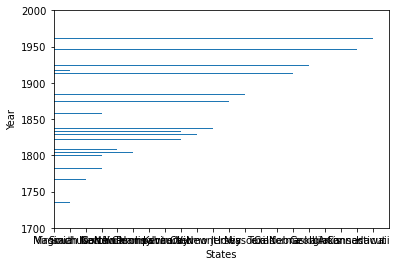

In [82]:
x = presidents_df4['Birth State']
y = presidents_df4['Year']
plt.ylim(top=2000) #ymax is your value
plt.ylim(bottom=1700)
plt.xlabel('States')
plt.ylabel('Year')
plt.barh(y, x)

This plot is hard to read since the states are crowded on the x-axis.

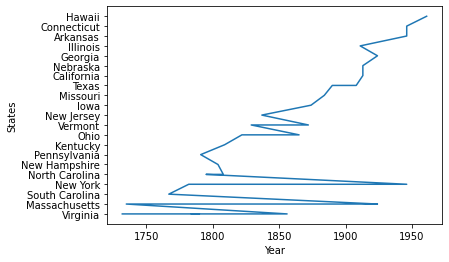

In [83]:
plt.xlabel('Year')
plt.ylabel('States')
plt.plot(presidents_df4['Year'],presidents_df4['Birth State'])

This plot doesn't tell us much but we can see variation in birth states over time.

In [84]:
presidents_df4.columns

Index(['Name', 'Day', 'Month', 'Year', 'Birth State', 'start', 'end', 'prior',
       'party', 'vice', 'State Code', 'Region', 'Division', 'Born',
       'Age atstart of presidency', 'Age atend of presidency'],
      dtype='object')

In [85]:
inaug = presidents_df4.loc[:,['Name','Year','Birth State','start']]
inaug.sort_values(by=['Year'], inplace = True)
inaug

,Name,Year,Birth State,start
0,George Washington,1732,Virginia,1789-04-30
8,John Adams,1735,Massachusetts,1797-03-04
1,Thomas Jefferson,1743,Virginia,1801-03-04
2,James Madison,1751,Virginia,1809-03-04
3,James Monroe,1758,Virginia,1817-03-04
9,John Quincy Adams,1767,Massachusetts,1825-03-04
12,Andrew Jackson,1767,South Carolina,1829-03-04
4,William Henry Harrison,1773,Virginia,1841-03-04
13,Martin Van Buren,1782,New York,1837-03-04
6,Zachary Taylor,1784,Virginia,1849-03-04


It was hard to make conclusions on this question since the dates in the 'start' column read in the wrong year for president's inauguration date. The only way I can think to fix it is to put the proper year in the original .csv file or overwrite all to dates for the start columns. 

However, since this data is ordered ascending we can see that states presidents were born in do vary over time.

We see presidents from the South and Northeast regions from the 1780s-1860s. We begin seeing some from the Midwest in late 1800s. From there it begins to vary.

The region that most presidents come from is the South and Norteast.

In [86]:
presidents_df3['Region'].value_counts()

South        16
Northeast    15
Midwest      11
West          2
Name: Region, dtype: int64

Perhaps this is because these were the first 13 states or colonies of the US.

In [87]:
presidents_df4

,Name,Day,Month,Year,Birth State,start,end,prior,party,vice,State Code,Region,Division,Born,Age atstart of presidency,Age atend of presidency
0,George Washington,22,2,1732,Virginia,1789-04-30,1797-03-04,Commander-in-Chief of the Continental Army ...,Nonpartisan [13],John Adams,VA,South,South Atlantic,"Feb 22, 1732[a]","57 years, 67 daysApr 30, 1789","65 years, 10 daysMar 4, 1797"
1,Thomas Jefferson,13,4,1743,Virginia,1801-03-04,1809-03-04,2nd Vice President of the United States,Democratic- Republican,Aaron Burr,VA,South,South Atlantic,"Apr 13, 1743[a]","57 years, 325 daysMar 4, 1801","65 years, 325 daysMar 4, 1809"
2,James Madison,16,3,1751,Virginia,1809-03-04,1817-03-04,5th United States Secretary of State (1801–...,Democratic- Republican,George Clinton,VA,South,South Atlantic,"Mar 16, 1751[a]","57 years, 353 daysMar 4, 1809","65 years, 353 daysMar 4, 1817"
3,James Monroe,28,4,1758,Virginia,1817-03-04,1825-03-04,7th United States Secretary of State (1811–...,Democratic- Republican,Daniel D. Tompkins,VA,South,South Atlantic,"Apr 28, 1758","58 years, 310 daysMar 4, 1817","66 years, 310 daysMar 4, 1825"
4,William Henry Harrison,9,2,1773,Virginia,1841-03-04,1841-04-04,United States Minister to Colombia (1828–1829),Whig,John Tyler,VA,South,South Atlantic,"Feb 9, 1773","68 years, 23 daysMar 4, 1841","68 years, 54 days Apr 4, 1841"
5,John Tyler,29,3,1790,Virginia,1841-04-04,1845-03-04,10th Vice President of the United States,"Whig April 4, 1841 – September 13, 1841",Office vacant,VA,South,South Atlantic,"Mar 29, 1790","51 years, 6 daysApr 4, 1841","54 years, 340 daysMar 4, 1845"
6,Zachary Taylor,24,11,1784,Virginia,1849-03-04,1850-07-09,Major General of the 1st Infantry Regiment ...,Whig,Millard Fillmore,VA,South,South Atlantic,"Nov 24, 1784","64 years, 100 daysMar 4, 1849","65 years, 227 daysJul 9, 1850"
7,Woodrow Wilson,28,12,1856,Virginia,2013-03-04,2021-03-04,34th Governor of New Jersey (1911–1913),Democratic,Thomas R. Marshall,VA,South,South Atlantic,"Dec 28, 1856","56 years, 66 daysMar 4, 1913","64 years, 66 daysMar 4, 1921"
8,John Adams,30,10,1735,Massachusetts,1797-03-04,1801-03-04,1st Vice President of the United States,Federalist,Thomas Jefferson,MA,Northeast,New England,"Oct 30, 1735[a]","61 years, 125 daysMar 4, 1797","65 years, 125 daysMar 4, 1801"
9,John Quincy Adams,11,7,1767,Massachusetts,1825-03-04,1829-03-04,8th United States Secretary of State (1817–...,Democratic- Republican,John C. Calhoun,MA,Northeast,New England,"Jul 11, 1767","57 years, 236 daysMar 4, 1825","61 years, 236 daysMar 4, 1829"
